# Подсчет слов в тексте c помощью PySpark

**Apache Spark** (от англ. spark — искра, вспышка) — фреймворк с открытым исходным кодом для реализации распределённой обработки неструктурированных и слабоструктурированных данных, входящий в экосистему проектов **Hadoop**. Поддерживает API для Python, Java, Scala и R.

## Парадигма Map Reduce

Данные на входе и выходе алгоритма всегда передаются в виде набора пар key, value
  
Для обработки данных необходимо реализовать две функции:     
  - **map** (in_key, in_value) -> list(out_key, intermediate_value)  
    - принимает на входе пару in_key, in_value  
    - возвращает список пар с промежуточными значениями out_key, intermediate_value  
  - **reduce** (out_key, list(intermediate_value)) -> list(out_key, out_value)  
    - обрабатывает промежуточные значения для ключа out_key    
    - возвращает результат обработки в виде списка (как правило из одного элемента)  

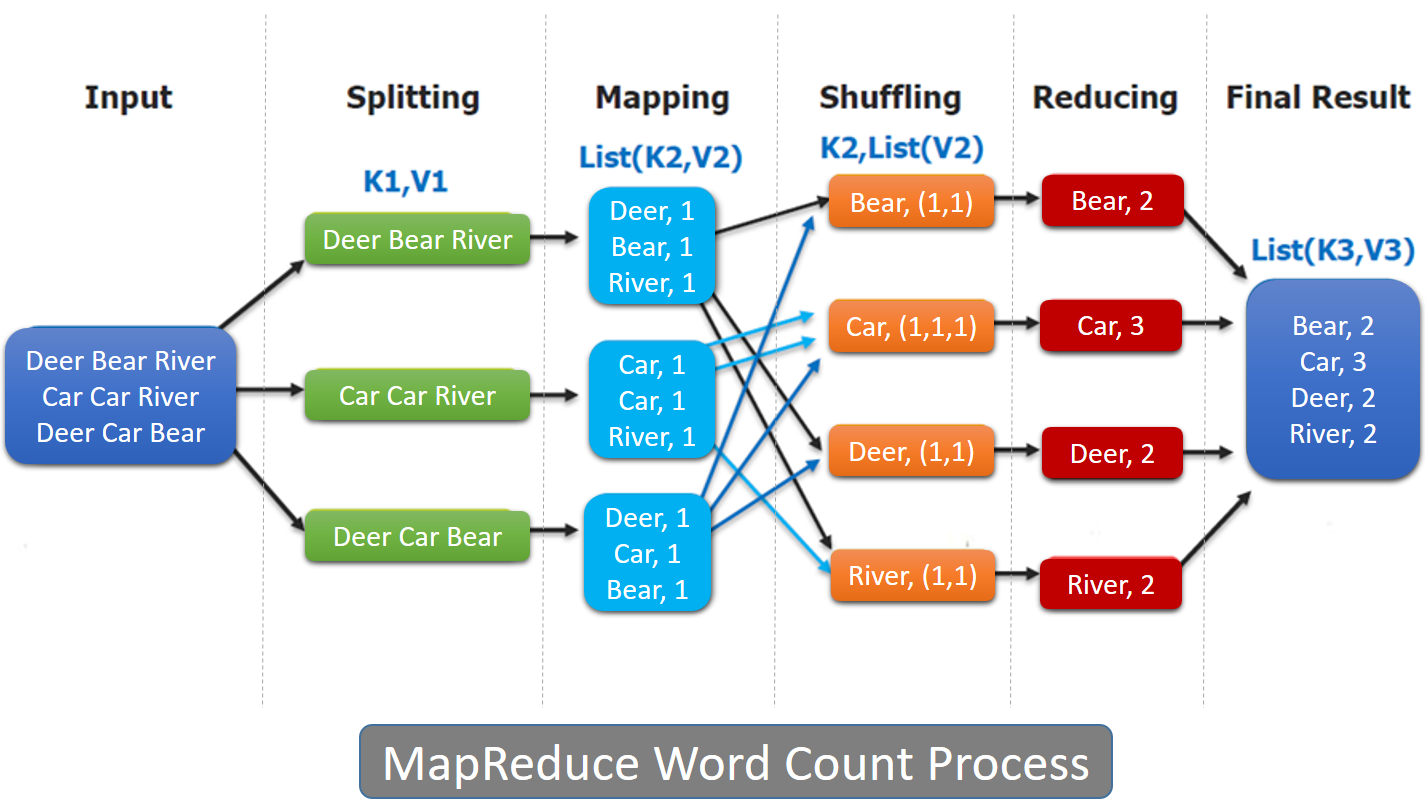

## RDD

 В отличие от классического обработчика из ядра Hadoop, реализующего двухуровневую концепцию MapReduce с дисковым хранилищем, Spark использует специализированные примитивы для рекуррентной обработки в оперативной памяти, благодаря чему позволяет получать значительный выигрыш в скорости работы для некоторых классов задач.

**RDD** (Resilient Distributed Datasets) - основной способ представления данных в Spark 
- Read-only  
- Представляет собой набор объектов одного типа  
- Каждый набор данных в RDD может быть разбит на логические части (chunk) и размещен на разных машинах кластера 

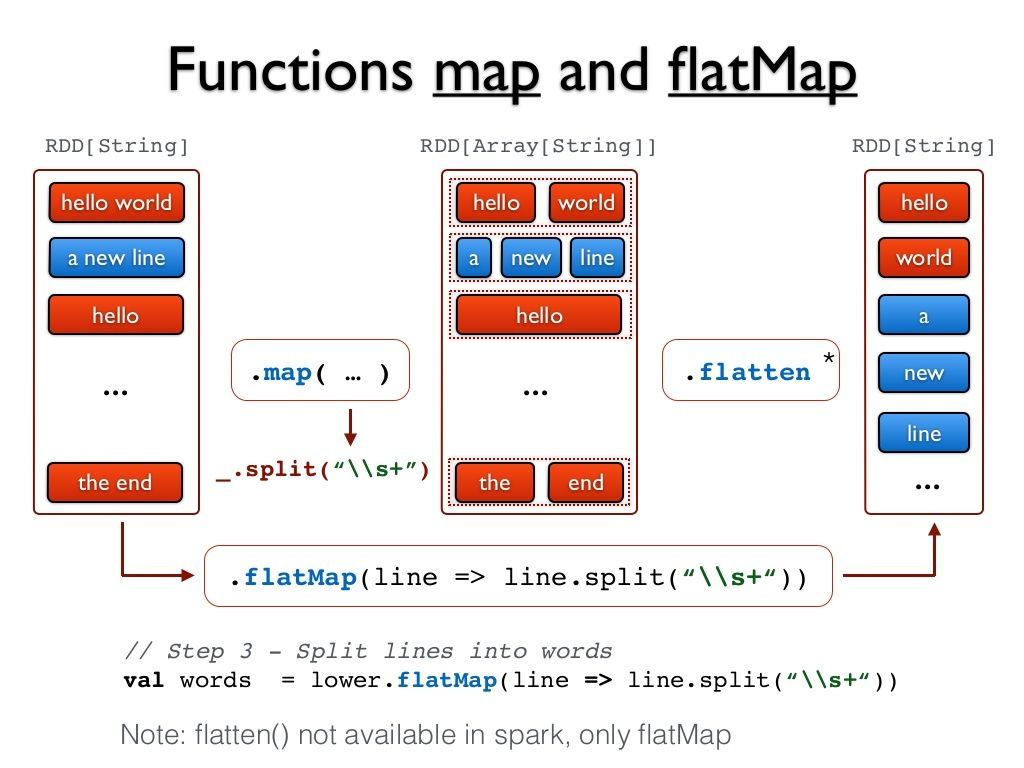

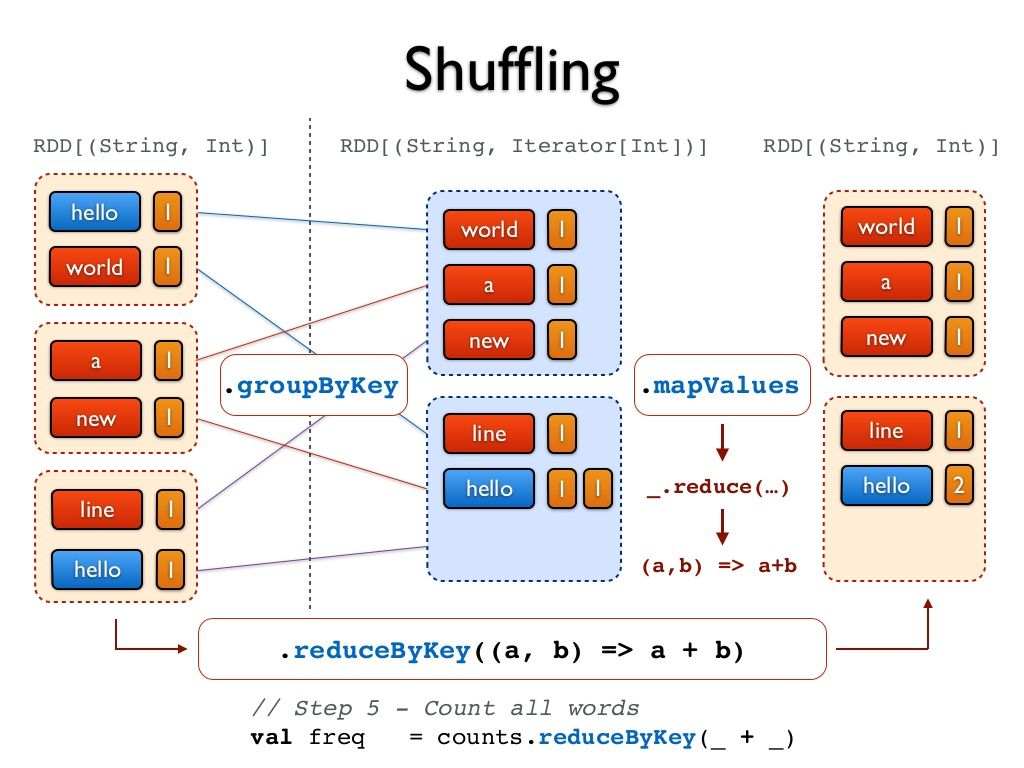

In [1]:
from pyspark import SparkContext
# creating spark context
sc = SparkContext('local', 'WordCount App')

In [2]:
# loading text from file
with open('data/idiot.txt') as src:
    text = src.readlines()

# making RDD from text lines
text_rdd = sc.parallelize(text)

In [3]:
text_rdd.collect()[0]

'Beauty will save the world.\n'

In [4]:
def process_line(line):
    return [('lines', 1), 
            ('words', len(line.split())),
            ('chars', len(line))]

# stats
stats_rdd = text_rdd.flatMap(process_line).reduceByKey(lambda x, y: x + y)
    
print('Stats: {}'.format(stats_rdd.collect()))

# shortest line
shortest_line = text_rdd.reduce(lambda x, y: x if len(x) < len(y) else y)
    
print('Shortest line: {}'.format(shortest_line))

Stats: [('lines', 17), ('words', 798), ('chars', 4566)]
Shortest line: Beauty will save the world.

